In [1]:
import requests
import base64
from dotenv import load_dotenv

In [2]:
import os


In [3]:
client_id=os.getenv('api_key')
client_secret=os.getenv('api_secret')

In [4]:
# base64 encode the client id and client secret
client_credentials=f"{client_id}:{client_secret}"
client_credentail_base64=base64.b64encode(client_credentials.encode())    



In [5]:
# Request the access token
url='https://accounts.spotify.com/api/token'
header={
    'Authorization': f'Basic {client_credentail_base64.decode()}'
}
data={
    'grant_type':'client_credentials'
}
response=requests.post(url,data=data,headers=header)

if response.status_code==200:
    access_token=response.json()['access_token']
    print('Access token successfully.')
    
else:
    print('Error')
    exit()

Access token successfully.


In [6]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth


In [7]:
def get_trading_playlist_data(playlist_id,access_token):
    #set up spotify with the access token
    sp=spotipy.Spotify(auth=access_token)
    
    #Get the track from the playlist
    playlist_tracks=sp.playlist_tracks(playlist_id,fields='items(track(id,name,artists,album(id,name)))')
    # Extract the information and store in a list
    music_data=[]
    for track_info in playlist_tracks['items']:
        track=track_info['track']
        track_name=track['name']                               
        artists=','.join([artist['name'] for artist in track['artists']])                               
        album_name=track['album']['name']  
        album_id=track['album']['id']                               
        track_id=track['id']                               
        #  Get audio features of the track
        audio_features=sp.audio_features(track_id)[0] if track_id !='Not available' else None
        # Get release date of the album
        try:
            album_info=sp.album(album_id) if album_id !='Not available' else None
            release_date=album_info['release_date']  if album_info !='Not available' else None
        except:
              release_date=None
        # Get the popularity of the track        
        try:
            track_info=sp.track(track_id)  if track_id !='Not available' else None  
            popularity=track_info['popularity']  if track_info !='Not available' else None  
        except:
              popularity=None
        # Add addititonal information of the track        
        track_data={
            'Track Name':track_name,
            'Artists': artists,
            'Album Name':album_name,
            'Album ID':album_id,
            'Track ID':track_id,
            'Popularity':popularity,
            'Relesae Date':release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None, 
            'Explicit': track_info.get('explicit',None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Enengy': audio_features['energy']  if audio_features else None,  
            'Key': audio_features['key']  if audio_features else None,  
            'Loudness':audio_features['loudness']  if audio_features else None,  
            'Mode': audio_features['mode']  if audio_features else None,  
            'Speechiness':audio_features['speechiness']  if audio_features else None,  
            'Acousticness': audio_features['acousticness']  if audio_features else None,  
            'Instrumentalness': audio_features['instrumentalness']  if audio_features else None,  
            'Liveness': audio_features['liveness']  if audio_features else None,  
            'Valence': audio_features['valence'] if audio_features else None,  
            'Tempo': audio_features['tempo']  if audio_features else None,  
        }
        music_data.append(track_data)
    # create dataframe for the list  
    df=pd.DataFrame(music_data)
    return df

In [8]:
playlist_id='09W6XbWEgo5TV5nVxn6JTH'
# call the function to get the music data for the playlist ans store in dataframe
data1=get_trading_playlist_data(playlist_id,access_token)
data1.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Urvashi,Yo Yo Honey Singh,Top 20 - Bollywood Dance Songs 2018,0Wtm0w4UXe2mqM0Ojbefg6,633pLYxOIA0M2xqs6A3fXG,31,2018-12-26,215483,False,0.792,0.703,0,-4.343,1,0.0368,0.195,0.000000,0.0720,0.634,105.995
1,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi",Fanaa,2L3NV5Fxjrj6mi59Gs5tUx,5EYZZvmNAH5VZCwuzYJqoA,73,2006-04-12,275931,False,0.829,0.665,2,-8.128,1,0.0868,0.242,0.000017,0.1230,0.861,122.043
2,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,Best Of Shraddha Kapoor,6EHCTm248DJb77KFh7qfLj,517bz7zkWELmyL4eZzJ5R9,67,2017-03-03,340400,False,0.552,0.750,10,-5.215,0,0.0390,0.445,0.000074,0.2910,0.400,89.999
3,Sunn Raha Hai,Ankit Tiwari,Aashiqui 2,0Rkv5iqjF2uenfL0OVB8hg,5PvwPy5eRO8BPwpRzCHK3D,73,2013-04-06,390223,False,0.394,0.641,0,-6.493,0,0.0312,0.276,0.000000,0.0958,0.335,81.932
4,"Sunn Raha Hai-Rozana (From ""T-Series Mixtape"")",Shreya Ghoshal,Best Of Shreya Ghoshal,4WELDMV021TUCe87ryn25t,4QLBU9YC60QU4wHwPuyzfk,44,2018-03-09,291070,False,0.381,0.504,8,-7.653,0,0.0362,0.766,0.000377,0.0799,0.122,78.029


In [9]:
playlist_id='6lmz3qBhge68DokCWekY9T'
# call the function to get the music data for the playlist ans store in dataframe
data2=get_trading_playlist_data(playlist_id,access_token)
data2.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Ranjha - Lofi Flip,"VIBIE,Jasleen Royal,B Praak",Ranjha (Lofi Flip),6TKxXgLUwZbPpBlKt2xfl7,7vwTvVDpsONocB0zr8ShtJ,61,2021-11-05,201600,False,0.581,0.432,1,-10.701,1,0.1680,0.799,0.000178,0.0844,0.309,150.185
1,Iktara - Lofi Flip,"Kavita Seth,Amitabh Bhattacharya,VIBIE",Iktara (Lofi Flip),21bNH0z2JgCevs7f6gNRgJ,7JOFplrLQfYkuEcWCASZDo,65,2021-07-09,173974,False,0.382,0.520,7,-12.319,1,0.0366,0.225,0.050600,0.4270,0.179,159.894
2,Tu Jaane Naa (Lofi Mix),"Pritam,Atif Aslam",Tu Jaane Naa (Lofi Mix),5GJLKREVmWlrLd3hQUBYjU,0ThEdqK8ZBi4nKNs1fOpJD,64,2021-11-19,338875,False,0.518,0.719,7,-4.863,1,0.0414,0.574,0.000070,0.2200,0.286,115.032
3,Satranga Lofi Flip,Kishan Bairwa Kanyakheri,Satranga Lofi Flip,7bWjXFq3r0tYTAlSYD6bRM,0Ln4MhMsJUDCIhqJPag3LD,44,2024-01-05,250590,False,0.171,0.438,7,-13.980,1,0.0723,0.907,0.948000,0.2360,0.157,75.352
4,Raanjhanaa - Lofi Flip,"Silent Ocean,Jaswinder Singh,Shiraz Uppal,A.R....",Raanjhanaa (Lofi Flip),2wMqpfs8Jdxh6ouQdHM5et,3TEpHcylaJDZyYOiBVzlwN,63,2021-10-15,190000,False,0.272,0.473,6,-11.030,0,0.0944,0.788,0.119000,0.9490,0.323,200.010


In [10]:
playlist_id='7pAAEyS7ebD4HHHkKhb1ma'
# call the function to get the music data for the playlist ans store in dataframe
data3=get_trading_playlist_data(playlist_id,access_token)
data3.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Tu Aake Dekhle,King,The Carnival,7uftfPn8f7lwtRLUrEVRYM,0yCWDaAgOtg6TKlNCg9rwA,13,2020-09-21,270000,False,0.770,0.840,11,-4.022,1,0.1070,0.5150,0.004520,0.1450,0.192,96.012
1,Insane,"AP Dhillon,Shinda Kahlon,Gurinder Gill,Gminxr",Insane,6EaHaUoczRLrDl5uqxSFW3,3UhmuWcFaLS3AO3kI9ynQ2,72,2021-04-16,206061,False,0.796,0.572,8,-7.030,0,0.0545,0.4160,0.000025,0.0975,0.304,98.967
2,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,72,2021-10-30,168450,False,0.795,0.670,1,-5.313,0,0.1430,0.2690,0.000000,0.0733,0.643,100.004
3,Jugnu,"Badshah,Nikhita Gandhi",Jugnu,1tIBidZ4PMZPqWLgunT4IP,2NTVtNcpC0i1R7LVGaCZCF,72,2021-10-26,230400,False,0.716,0.803,10,-5.140,0,0.0445,0.0300,0.000000,0.0817,0.325,124.961
4,Ghana Kasoota (feat. Surbhi Jyoti),"Raftaar,Rashmeet Kaur,Surbhi Jyoti",Ghana Kasoota (feat. Surbhi Jyoti),5wNK25BcVubz95drmXiBCZ,0mvcsYusnTYlAkOZ077lDb,66,2021-11-11,168641,False,0.877,0.781,5,-4.459,0,0.0548,0.0315,0.000397,0.2390,0.373,102.994


In [11]:
playlist_id='34nBMvQ9JW7ttJUsWb6HxC'
# call the function to get the music data for the playlist ans store in dataframe
data4=get_trading_playlist_data(playlist_id,access_token)
data4.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Falling,Trevor Daniel,Nicotine,1Hy76RlNvOHe6cpih1RxXq,2rRJrJEo19S2J82BDsQ3F7,1,2020-03-26,159382,False,0.784,0.430,10,-8.756,0,0.0364,0.1230,0.0,0.0887,0.236,127.087
1,Astronaut In The Ocean,Masked Wolf,Astronaut In The Ocean (International Remixes),4YtSVQwETLHiKNZXySp7Mw,0BGwAKW4u8kWOhWFflZxfl,56,2019-01-01,132780,True,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.0,0.1500,0.472,149.996
2,Let Me Down Slowly,Alec Benjamin,Narrated For You,6jKZplJpy21R5lHaYHHjmZ,2qxmye6gAegTMjLKEBoR3d,88,2018-11-16,169354,False,0.652,0.557,1,-5.714,0,0.0318,0.7400,0.0,0.1240,0.483,150.073
3,2002,Anne-Marie,Speak Your Mind (Deluxe),7lPoGKpCGgdKFAxpudhAH5,2BgEsaKNfHUdlh97KmvFyo,84,2018-04-27,186987,False,0.697,0.683,1,-2.881,0,0.1170,0.0372,0.0,0.1370,0.603,96.133
4,Shape of You,Ed Sheeran,÷ (Deluxe),3T4tUhGYeRNVUGevb0wThu,7qiZfU4dY1lWllzX7mPBI3,89,2017-03-03,233713,False,0.825,0.652,1,-3.183,0,0.0802,0.5810,0.0,0.0931,0.931,95.977


In [12]:
playlist_id='34DZZno0NazeAXMgPfZThd'
# call the function to get the music data for the playlist ans store in dataframe
data5=get_trading_playlist_data(playlist_id,access_token)
data5.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Bum Bum Tam Tam,"MC Fioti,Future,J Balvin,Stefflon Don,Juan Magán",Bum Bum Tam Tam,1E6aIrYOcysBusmGfm2Pcm,6k2900NjJeVqZM55G3Danu,70,2017-12-15,213989,True,0.896,0.675,1,-3.908,1,0.1240,0.3460,0.000008,0.2620,0.659,131.999
1,Danza Kuduro,"Don Omar,Lucenzo",Danza Kuduro,4YUtezddxoqgpyf6OVu0NE,5XSZ8onipRr35H0wpWWsW3,0,2010-01-01,199213,False,0.701,0.914,0,-4.938,1,0.0851,0.0817,0.000000,0.0448,0.886,130.078
2,Bailar (feat. Pitbull & Elvis Crespo),"Deorro,Pitbull,Elvis Crespo",Bailar (feat. Pitbull & Elvis Crespo),22MgjjCdxCVkBuxqRi81gs,1A5yplwEk6cJbAL63L6bkp,64,2016-09-02,160305,False,0.750,0.891,9,-3.738,1,0.2270,0.0249,0.000006,0.0569,0.553,128.065
3,Fireball (feat. John Ryan),"Pitbull,John Ryan",Globalization,4EUf4YyNjuXypWY6W5wEDm,4Y7XAxTANhu3lmnLAzhWJW,80,2014-11-21,236200,False,0.761,0.933,10,-5.380,1,0.0560,0.0908,0.000085,0.0607,0.836,122.959
4,QUE PRETENDES,"J Balvin,Bad Bunny",OASIS,6ylFfzx32ICw4L1A7YWNLN,25ZAibhr3bdlMCLmubZDVt,80,2019-06-28,222347,False,0.639,0.791,10,-4.443,0,0.2530,0.0275,0.000000,0.3620,0.939,92.603


In [13]:
for i in data1,data2,data3,data4,data5:
    print(i.shape)

(100, 20)
(96, 20)
(100, 20)
(100, 20)
(100, 20)


In [14]:
data=pd.concat([data1,data2,data3,data4,data5],ignore_index='True')
data.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Relesae Date,Duration (ms),Explicit,Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Urvashi,Yo Yo Honey Singh,Top 20 - Bollywood Dance Songs 2018,0Wtm0w4UXe2mqM0Ojbefg6,633pLYxOIA0M2xqs6A3fXG,31,2018-12-26,215483,False,0.792,0.703,0,-4.343,1,0.0368,0.195,0.000000,0.0720,0.634,105.995
1,Chand Sifarish,"Jatin-Lalit,Shaan,Kailash Kher,Prasoon Joshi",Fanaa,2L3NV5Fxjrj6mi59Gs5tUx,5EYZZvmNAH5VZCwuzYJqoA,73,2006-04-12,275931,False,0.829,0.665,2,-8.128,1,0.0868,0.242,0.000017,0.1230,0.861,122.043
2,"Galliyan (From ""Ek Villain"")",Ankit Tiwari,Best Of Shraddha Kapoor,6EHCTm248DJb77KFh7qfLj,517bz7zkWELmyL4eZzJ5R9,67,2017-03-03,340400,False,0.552,0.750,10,-5.215,0,0.0390,0.445,0.000074,0.2910,0.400,89.999
3,Sunn Raha Hai,Ankit Tiwari,Aashiqui 2,0Rkv5iqjF2uenfL0OVB8hg,5PvwPy5eRO8BPwpRzCHK3D,73,2013-04-06,390223,False,0.394,0.641,0,-6.493,0,0.0312,0.276,0.000000,0.0958,0.335,81.932
4,"Sunn Raha Hai-Rozana (From ""T-Series Mixtape"")",Shreya Ghoshal,Best Of Shreya Ghoshal,4WELDMV021TUCe87ryn25t,4QLBU9YC60QU4wHwPuyzfk,44,2018-03-09,291070,False,0.381,0.504,8,-7.653,0,0.0362,0.766,0.000377,0.0799,0.122,78.029


In [15]:
#check if there is any null value is present or not
data.isnull().sum()

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Relesae Date        0
Duration (ms)       0
Explicit            0
Danceability        0
Enengy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [16]:
sns.heatmap(data.isnull())

NameError: name 'sns' is not defined

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        496 non-null    object 
 1   Artists           496 non-null    object 
 2   Album Name        496 non-null    object 
 3   Album ID          496 non-null    object 
 4   Track ID          496 non-null    object 
 5   Popularity        496 non-null    int64  
 6   Relesae Date      496 non-null    object 
 7   Duration (ms)     496 non-null    int64  
 8   Explicit          496 non-null    bool   
 9   Danceability      496 non-null    float64
 10  Enengy            496 non-null    float64
 11  Key               496 non-null    int64  
 12  Loudness          496 non-null    float64
 13  Mode              496 non-null    int64  
 14  Speechiness       496 non-null    float64
 15  Acousticness      496 non-null    float64
 16  Instrumentalness  496 non-null    float64
 1

In [18]:
# ckeck the shape of the dataframe
data.shape

(496, 20)

In [45]:
data.describe()

,Popularity,Duration (ms),Danceability,Enengy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,58.242000,218136.634000,0.711684,0.711670,5.056000,-5.393926,0.448000,0.093136,0.213642,0.002719,0.154491,0.593524,115.928780
std,20.514315,54065.047694,0.127271,0.152139,3.723519,2.340001,0.497787,0.071487,0.205553,0.019442,0.122257,0.209217,27.323316
min,0.000000,58149.000000,0.247000,0.128000,0.000000,-18.717000,0.000000,0.023600,0.000441,0.000000,0.019500,0.120000,67.443000
25%,50.000000,186097.000000,0.637000,0.625750,1.000000,-6.700750,0.000000,0.044400,0.049150,0.000000,0.081700,0.443500,95.996500
50%,63.000000,205888.000000,0.727000,0.728000,5.000000,-4.933500,0.000000,0.068500,0.142000,0.000002,0.112000,0.609500,105.013000
75%,72.000000,231711.500000,0.801250,0.824250,8.000000,-3.893750,1.000000,0.115500,0.321500,0.000060,0.178250,0.753000,130.024000
max,93.000000,446987.000000,0.980000,0.979000,11.000000,-0.223000,1.000000,0.475000,0.934000,0.234000,0.841000,0.973000,191.970000


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_4860\226211328.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

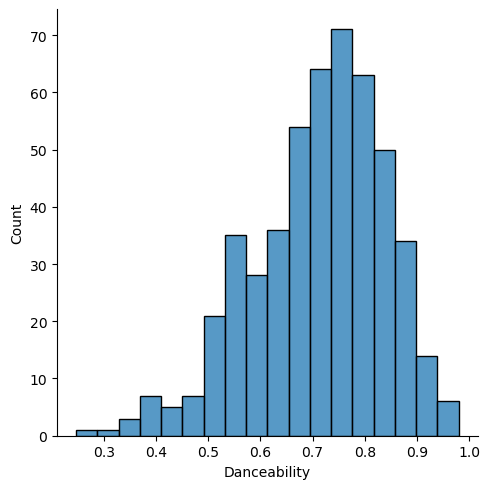

<Figure size 640x480 with 0 Axes>

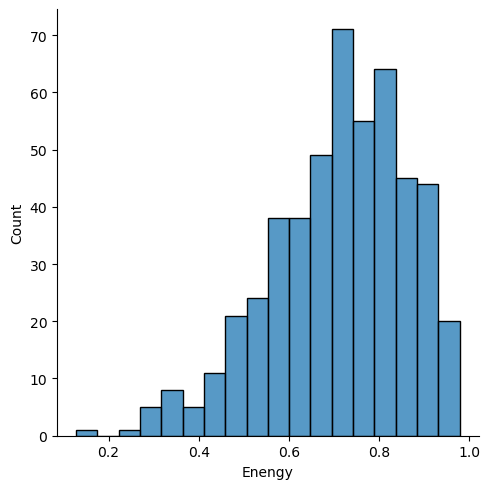

<Figure size 640x480 with 0 Axes>

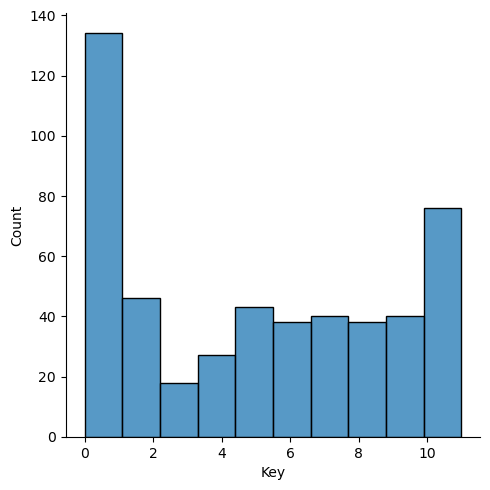

<Figure size 640x480 with 0 Axes>

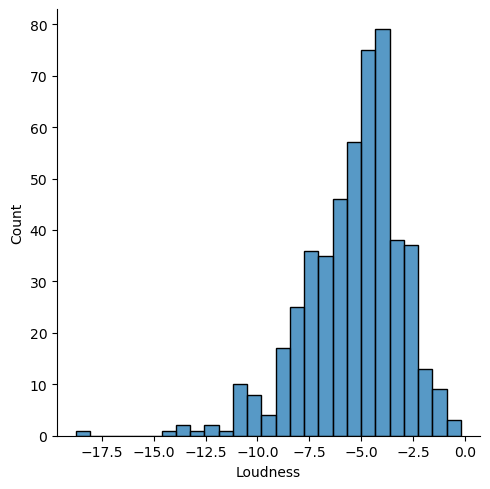

<Figure size 640x480 with 0 Axes>

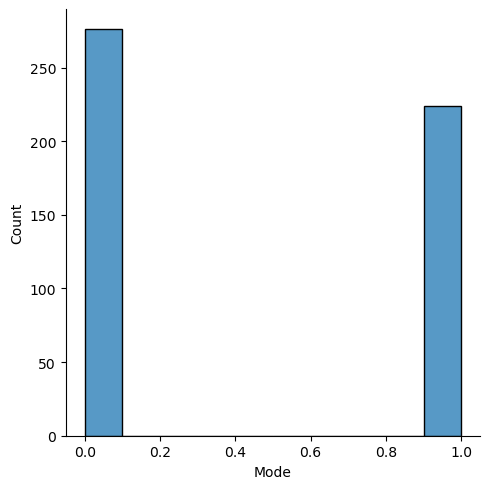

<Figure size 640x480 with 0 Axes>

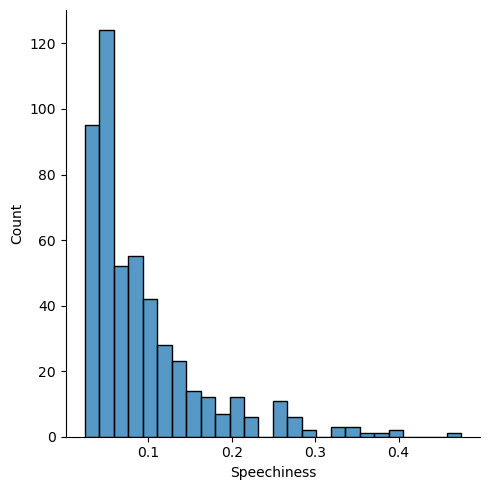

<Figure size 640x480 with 0 Axes>

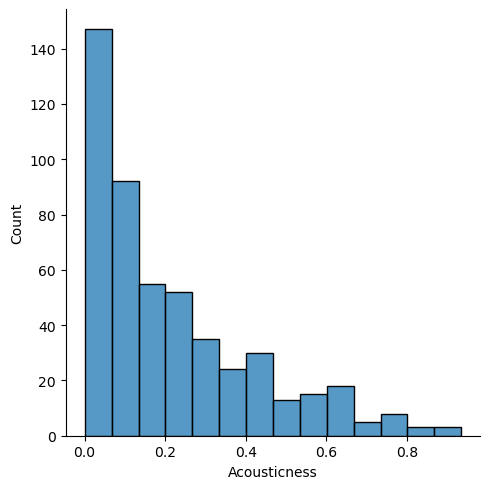

<Figure size 640x480 with 0 Axes>

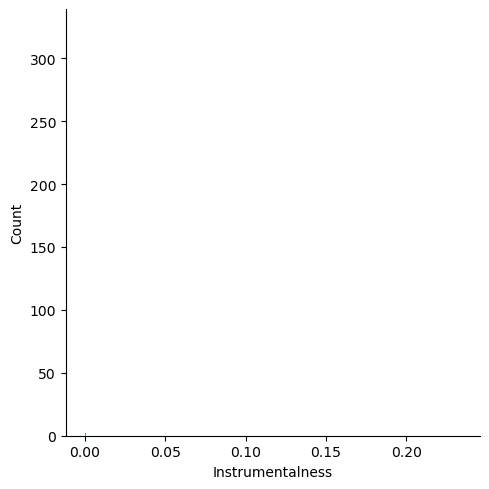

<Figure size 640x480 with 0 Axes>

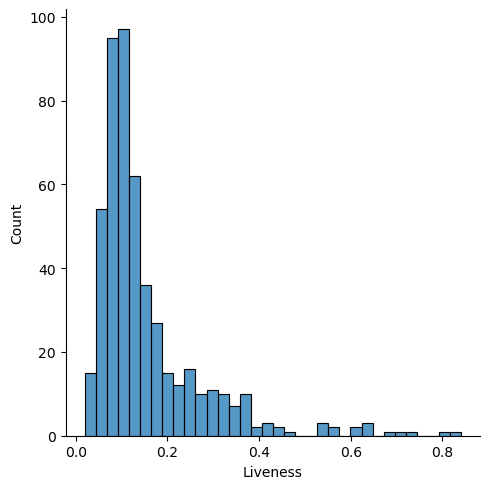

<Figure size 640x480 with 0 Axes>

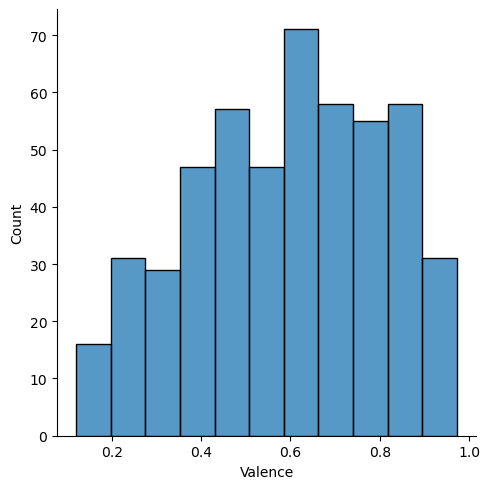

<Figure size 640x480 with 0 Axes>

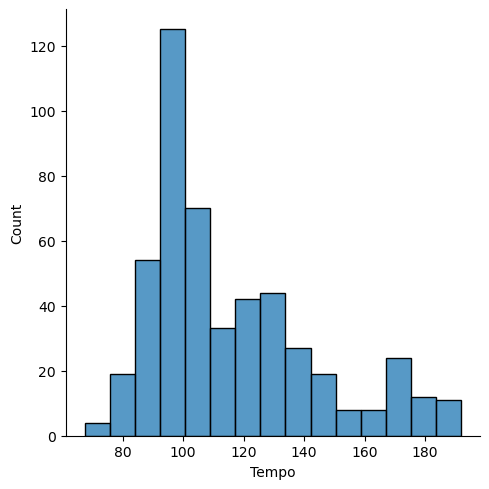

In [68]:
# lets see the distribution of each features
features=['Danceability','Enengy','Key','Loudness','Mode',
        'Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo']
for i in features:
    plt.figure()
    sns.displot(data[i],kde=False)

<AxesSubplot:>

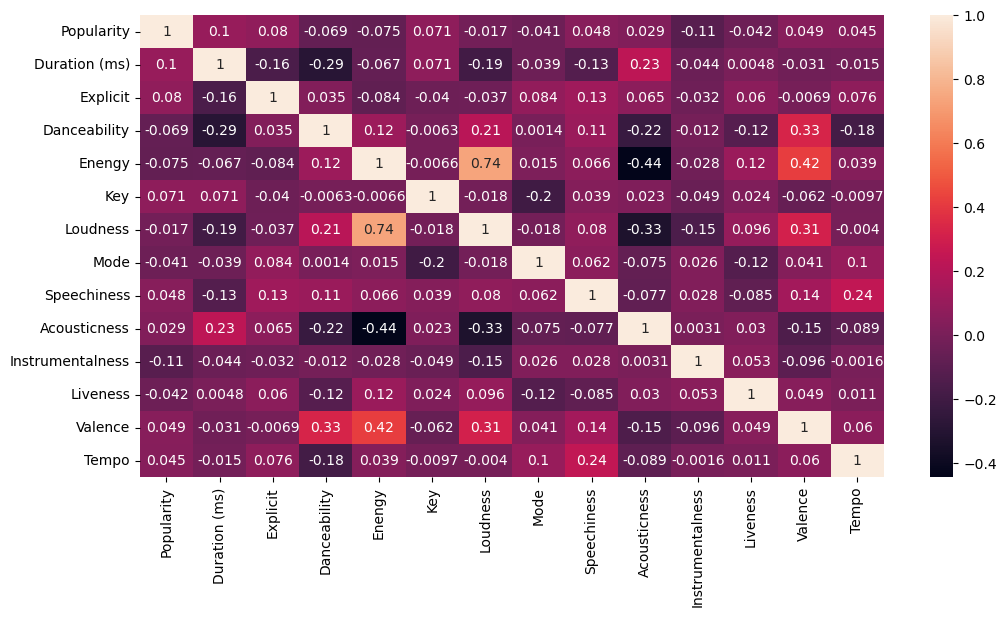

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, '10 Most popular song')

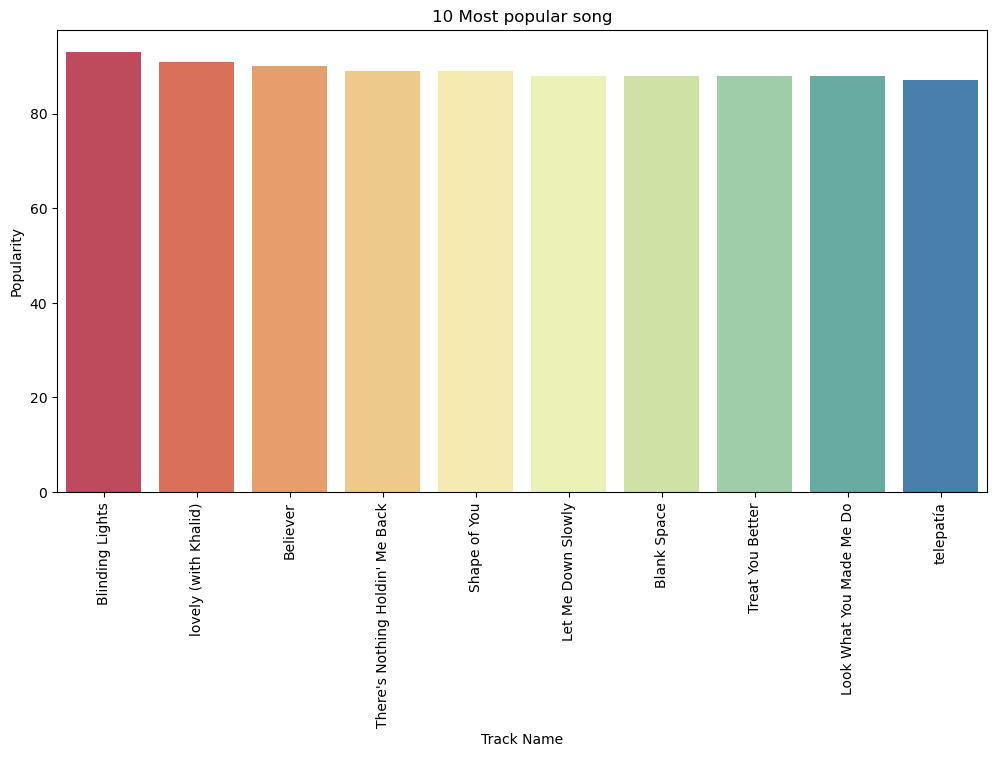

In [65]:
plt.figure(figsize=(12,6))
most_trending_sond=data.groupby(by='Track Name')['Popularity'].max().sort_values(ascending=False).head(10)
sns.barplot(x=most_trending_sond.index,y=most_trending_sond,palette='Spectral')
plt.xticks(rotation=90)
plt.title('10 Most popular song')

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

In [20]:
# function to calculate weight popularity score based on release date
def weight_popularity(Relesae_date):
    
    #convert the release date into  datatimeobject
    relesae_date=datetime.strptime(Relesae_date,'%Y-%m-%d')
    
    #calculate the release date and todays date
    time_span=datetime.now()-relesae_date
    
    # calculate the weight popularity based on the time span
    weight=1/(time_span.days+1)
    return weight

In [21]:
# Normalize the music features using min_max scaler
scaler=MinMaxScaler()
music_features=data[['Danceability','Enengy','Key','Loudness','Mode',
                'Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo']].values
music_features_scaled=scaler.fit_transform(music_features)

In [22]:
similarity=cosine_similarity(music_features_scaled,music_features_scaled)

In [23]:
# function to get content based recommendations based music_features
def content_based_recommendation(input_song_name,num_of_recommendation):
    if input_song_name not in data['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return
    
    #Get index of the input song in data dataframe
    input_song_index=data[data['Track Name']==input_song_name].index[0]
    
    #calculate similarity score based on music features
    similarity_score=list(enumerate(similarity[input_song_index]))
    similarity_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
    
    similarity_score=similarity_score[1:num_of_recommendation+1]
    
    # Get the indices of the most similar songs
    similar_song_indices = [i[0] for i in similarity_score]
    
    #Get the names of most silmilar song based on content based filtering
    content_based_recommendation=data.iloc[similar_song_indices][['Track Name','Artists','Album Name','Popularity','Relesae Date']]
    
    return content_based_recommendation


In [24]:
# function to get hybrid based recommendation using weight popularity
def hybrid_based_recommendation(input_song_name,num_of_recommendation):
    if input_song_name not in data['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return
     
    #get content based recommendation
    content_based_recomm = content_based_recommendation(input_song_name,num_of_recommendation)
    
    # get popularity of input_song
    popularity_score=data.loc[data['Track Name']==input_song_name,'Popularity'].values[0]
    
    #get weight popularity score
    weight_popularity_score=popularity_score * weight_popularity(data.loc[data['Track Name']==input_song_name,'Relesae Date'].values[0])
    
    hybrid_recommendation = content_based_recomm
    hybrid_recommendation=hybrid_recommendation.append({
        'Track Name':input_song_name,
        'Artists':data.loc[data['Track Name']==input_song_name,'Artists'].values[0],
        'Album Name':data.loc[data['Track Name']==input_song_name,'Album Name'].values[0],
        'Popularity':weight_popularity_score,
        'Relesae Date':data.loc[data['Track Name']==input_song_name,'Relesae Date'].values[0],
    },ignore_index=True)
    
    hybrid_recommendation.sort_values(by='Popularity',ascending=False)
    hybrid_recommendation=hybrid_recommendation[hybrid_recommendation['Track Name'] != input_song_name]
    return hybrid_recommendation
    

In [25]:
input_song_name='Falling'
recom=hybrid_based_recommendation(input_song_name,num_of_recommendation=5)
print(f"recommended song for {input_song_name}:" )
print(recom)

recommended song for Falling:
              Track Name                                            Artists  \
0               Mi Gente                             J Balvin,Willy William   
1  Muskaanein Jhooti Hai                                      Suman Sridhar   
2               It's You                                          Ali Gatie   
3        Pal - Lofi Flip  Kritiman Mishra,Arijit Singh,Shreya Ghoshal,Ja...   
4                  Queen                                         Loren Gray   

        Album Name  Popularity Relesae Date  
0         Mi Gente        71.0   2017-06-30  
1          Talaash        59.0   2012-10-18  
2              YOU        82.0   2019-11-08  
3  Pal (Lofi Flip)        60.0   2022-05-13  
4            Queen        63.0   2018-12-21  


C:\Users\HP\AppData\Local\Temp\ipykernel_16132\283706252.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hybrid_recommendation=hybrid_recommendation.append({


In [26]:
import pickle

In [27]:
pickle.dump(data,open('music1.pkl','wb'))

In [28]:
pickle.dump(similarity,open('similarity1.pkl','wb'))

In [33]:
recom=content_based_recommendation('Khudaya Ve',5)

In [34]:
print(recom)

              Track Name                              Artists  \
46                  Ghar  Pritam,Nikhita Gandhi,Mohit Chauhan   
6               Hawayein                  Pritam,Arijit Singh   
58  Abhi Mujh Mein Kahin                 Ajay-Atul,Sonu Nigam   
17                Raabta                  Pritam,Arijit Singh   
16     Agar Tum Saath Ho             Alka Yagnik,Arijit Singh   

                                           Album Name  Popularity Relesae Date  
46  Jab Harry Met Sejal (Original Motion Picture S...          43   2017-08-03  
6   Jab Harry Met Sejal (Original Motion Picture S...          74   2017-08-03  
58     Agneepath (Original Motion Picture Soundtrack)          66   2011-12-16  
17                                        Agent Vinod          74   2012-02-24  
16                                            Tamasha          76   2015-10-16  


In [1]:
print(hybrid_based_recommendation('Falling',5))

NameError: name 'hybrid_based_recommendation' is not defined